# Strain related calculations with Python

Most of the functions we need are provided by `NumPy` and `Matplotlib`, which could be used in jupyter notebook using magic command `%pylab` with argument `inline` so all graphics will be shown within notebook

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Deformation gradient is usually entered as numpy `array`

In [2]:
F = array([[1, 1], [0, 1]])
F

array([[1, 1],
       [0, 1]])

Now we can calculate singular value decomposition

In [3]:
u,s,v = svd(F)

The axial ratio of the strain ellipse is defined as ratio of principal axes of ellipse, i.e. principal stretches, which are returned by `svd` in vector `s`:

In [4]:
s[0]/s[1]

2.6180339887498953

To find orientation of the strain ellipse we can calculate angle from last rotation matrix. The angle from x axis is:

In [5]:
rad2deg(arctan2(u[1,0], u[0,0]))

31.71747441146101

or angle from y axis is

In [6]:
rad2deg(arctan2(u[0,0], u[1,0]))

58.282525588538995

### Relation between shear deformation and strain ellipse axial ratio

Here we make a small script to calcluate axial ratio as a function of shear deformation $\gamma$

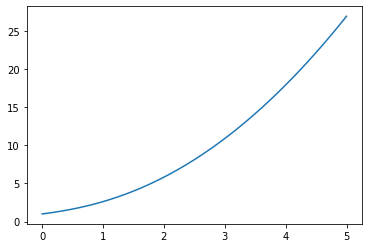

In [7]:
gammas = linspace(0, 5, 100)
ar = []
for gamma in gammas:
    F = array([[1, gamma], [0, 1]])
    u,s,v = svd(F)
    ar.append(s[0]/s[1])
plot(gammas, ar);

We can also plot the angle of first principal axis to shear plane i.e. x direction:

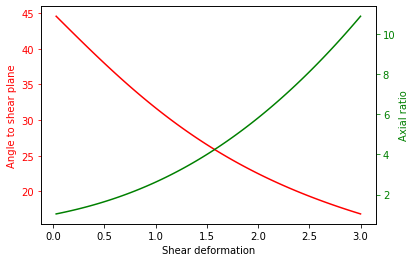

In [8]:
gammas = linspace(0, 3, 100)[1:]
ar = []
theta = []
for gamma in gammas:
    F = array([[1, gamma], [0, 1]])
    u,s,v = svd(F)
    ar.append(s[0]/s[1])
    theta.append(rad2deg(arctan2(u[1,0], u[0,0])))
f, ax1 = subplots()
ax2 = ax1.twinx()
ax1.plot(gammas, theta, 'r')
ax1.set_ylabel('Angle to shear plane', color='r')
ax1.tick_params('y', colors='r')
ax1.set_xlabel('Shear deformation')
ax2.plot(gammas, ar, 'g')
ax2.set_ylabel('Axial ratio', color='g')
ax2.tick_params('y', colors='g');

## Deformation tensors

Here we calculate deformation tensors for given deformation gradient and we will explore relation to polar decomposition

In [9]:
F = array([[1.7320508075688774, -0.25], [1, 0.43301270189221935]])
F

array([[ 1.73205081, -0.25      ],
       [ 1.        ,  0.4330127 ]])

Firstly we calculate Finger or Left Cauchy-Green deformation tensor **B** and Green’s or Right Cauchy-Green deformation tensor **C**:

In [10]:
B = F @ F.T
C = F.T @ F

The right stretch tensor **U** and left stretch tensor **V** could be calculated as square roots of **C** and **B** respectively. To calculate square root of matrix we need to import function `sqrtm` from `scipy`:

In [11]:
from scipy.linalg import sqrtm

In [12]:
V = sqrtm(B)
U = sqrtm(C)

The rotation matrix **R** could be calculated from left or right polar decomposition:
\begin{align*}
\mathbf{R} \cdot \mathbf{U} &= \mathbf{F} \\
\mathbf{R} &= \mathbf{F} \cdot \mathbf{U}^{-1}
\end{align*}
or
\begin{align*}
\mathbf{V} \cdot \mathbf{R} &= \mathbf{F} \\
\mathbf{R} &= \mathbf{V}^{-1} \cdot \mathbf{F}
\end{align*}


In [13]:
R = inv(V) @ F
print('From right polar decomposition\n', R)
R = F @ inv(U)
print('From left polar decomposition\n',R)

From right polar decomposition
 [[ 0.8660254 -0.5      ]
 [ 0.5        0.8660254]]
From left polar decomposition
 [[ 0.8660254 -0.5      ]
 [ 0.5        0.8660254]]


To visualize deformation gradients we can use library `sg2lib` found in repository:

In [14]:
from sg2lib import *

### Right polar decomposition

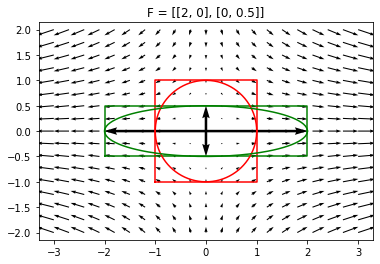

In [15]:
def_show(U)

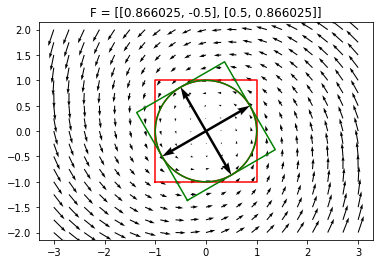

In [16]:
def_show(R)

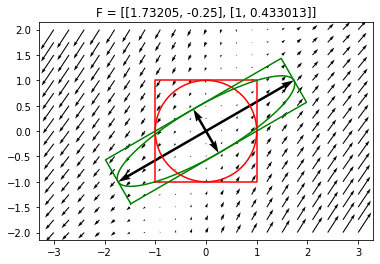

In [17]:
def_show(R @ U)

### Left polar decomposition

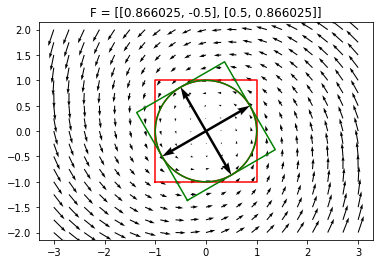

In [18]:
def_show(R)

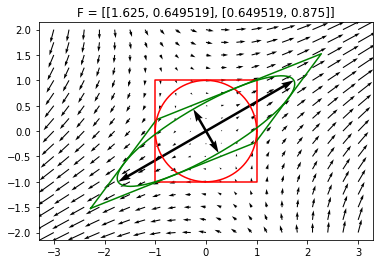

In [19]:
def_show(V)

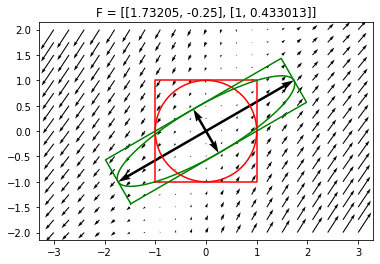

In [20]:
def_show(V @ R)

In [21]:
from IPython.core.display import HTML
def css_styling():
    styles = open("./css/sg2.css", "r").read()
    return HTML(styles)
css_styling()